In [1]:
from value import Value, draw_dot, graph_size

# Neural Networs

In [2]:
import random

class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(0)
        
    def __call__(self, x):
        # return tanh(w * x + b)
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

In [3]:
n = Neuron(3)
n.w, n.b

([Value(, data=-0.324138044962448, grad=0.0),
  Value(, data=0.4892606357171938, grad=0.0),
  Value(, data=-0.912701556631982, grad=0.0)],
 Value(, data=0, grad=0.0))

In [4]:
n([1, -1, 2])

Value(, data=-0.9898425522263055, grad=0.0)

In [5]:
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs

In [6]:
l = Layer(5, 3)

In [7]:
l([1, -1, 2, 0, 0.9])

[Value(, data=0.6843907415109344, grad=0.0),
 Value(, data=-0.5408985037972043, grad=0.0),
 Value(, data=0.02982301509492105, grad=0.0)]

In [8]:
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs if len(outs) > 1 else outs[0]

In [9]:
l = Layer(5, 1)
l([1, -1, 2, 0, 0.9])

Value(, data=0.9622740976724393, grad=0.0)

In [10]:
class MLP:
    
    def __init__(self, nin, nout):
        sz = [nin] + nout
        self.layers = [Layer(zi, zo) for zi, zo in zip(sz, sz[1:])]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [11]:
m = MLP(3, [4, 4, 1])
inp = [-1, 0.5, 3]
m(inp)

Value(, data=-0.5888382908949817, grad=0.0)

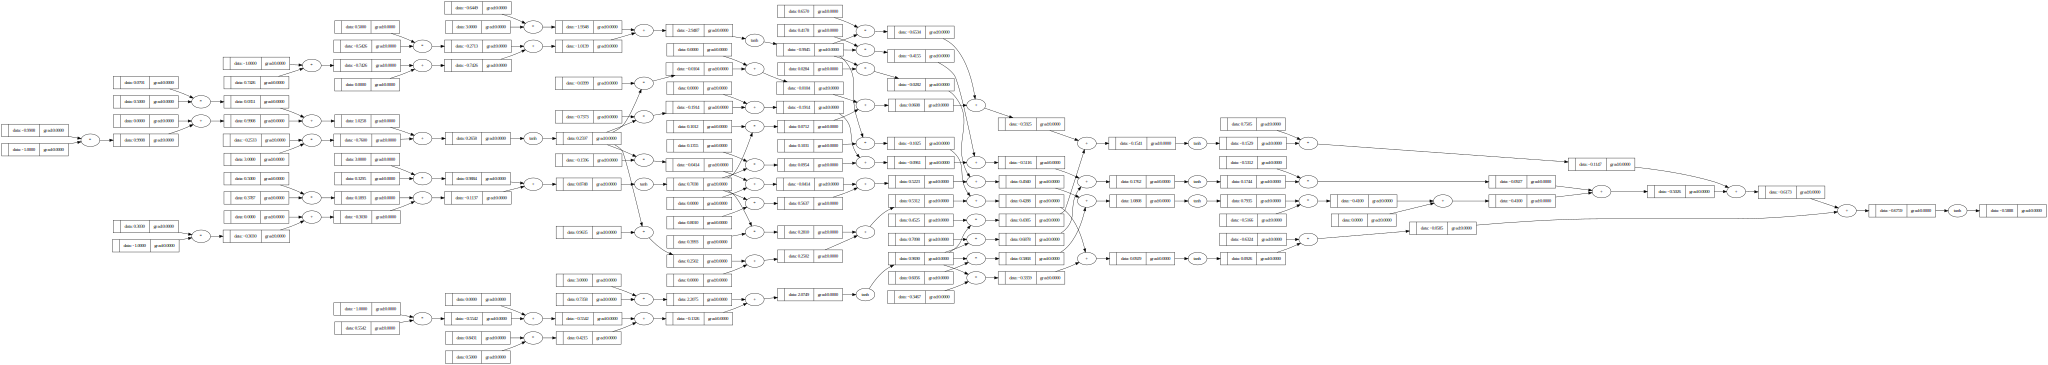

In [12]:
draw_dot(m(inp))

With all the available tools, lets train the network with a simple dataset:

In [13]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, -1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # targets

In [14]:
ypred = [m(x) for x in xs]
ypred

[Value(, data=-0.004604374683267987, grad=0.0),
 Value(, data=0.1312079429771895, grad=0.0),
 Value(, data=-0.04843976839764966, grad=0.0),
 Value(, data=0.04411525383737876, grad=0.0)]

In [15]:
[(yout-ygt)**2 for ygt, yout in zip(ys, ypred)]

[Value(, data=1.00922994963276, grad=0.0),
 Value(, data=1.2796314102546844, grad=0.0),
 Value(, data=0.9054668743671187, grad=0.0),
 Value(, data=0.9137156479463787, grad=0.0)]

In [16]:
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(, data=4.108043882200942, grad=0.0)

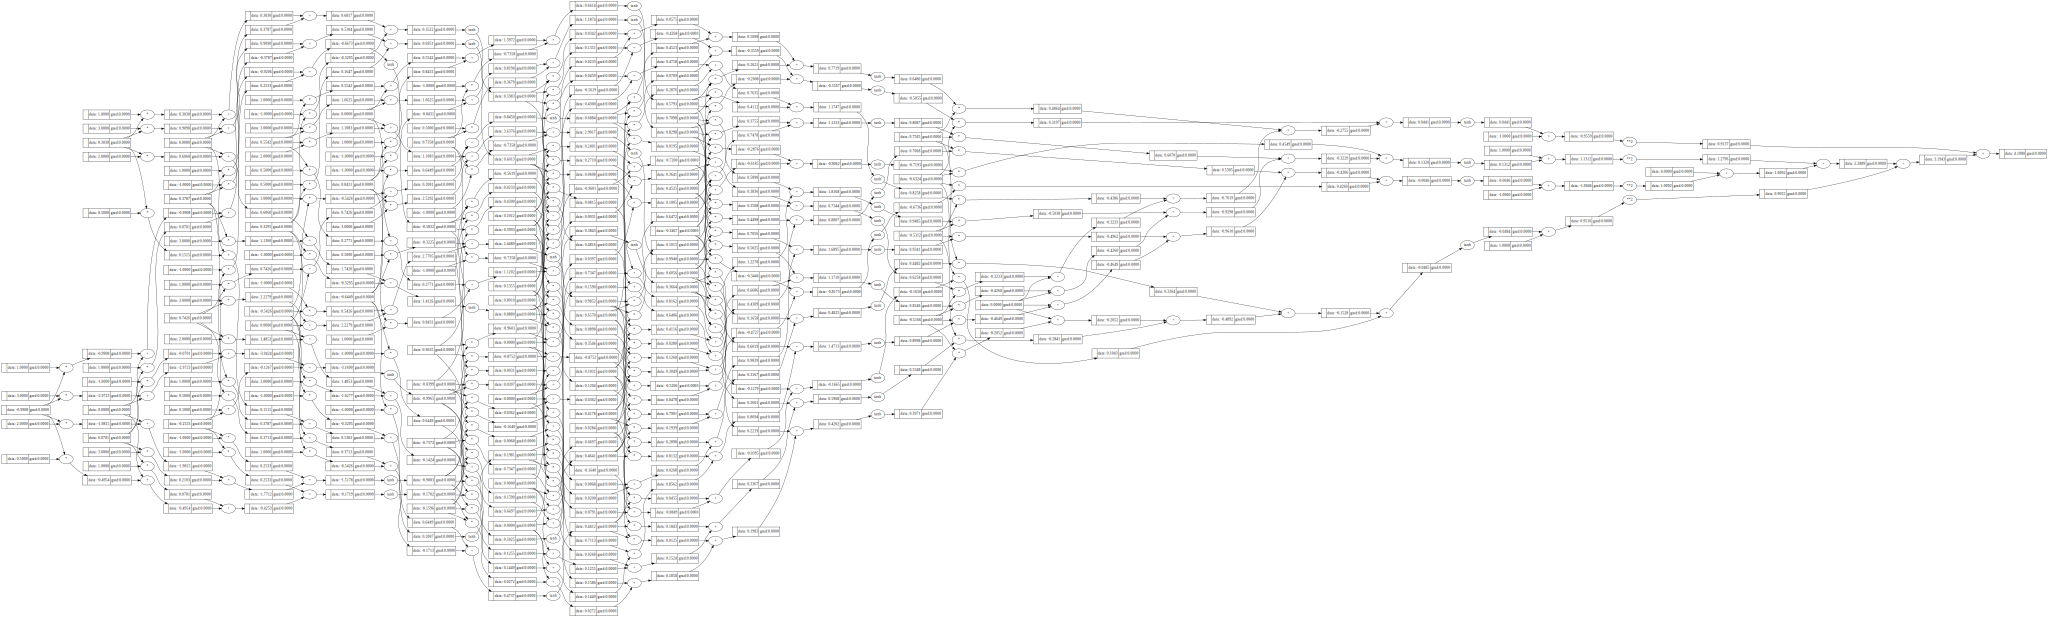

In [17]:
draw_dot(loss)

In [18]:
graph_size(loss)

(398, 568)

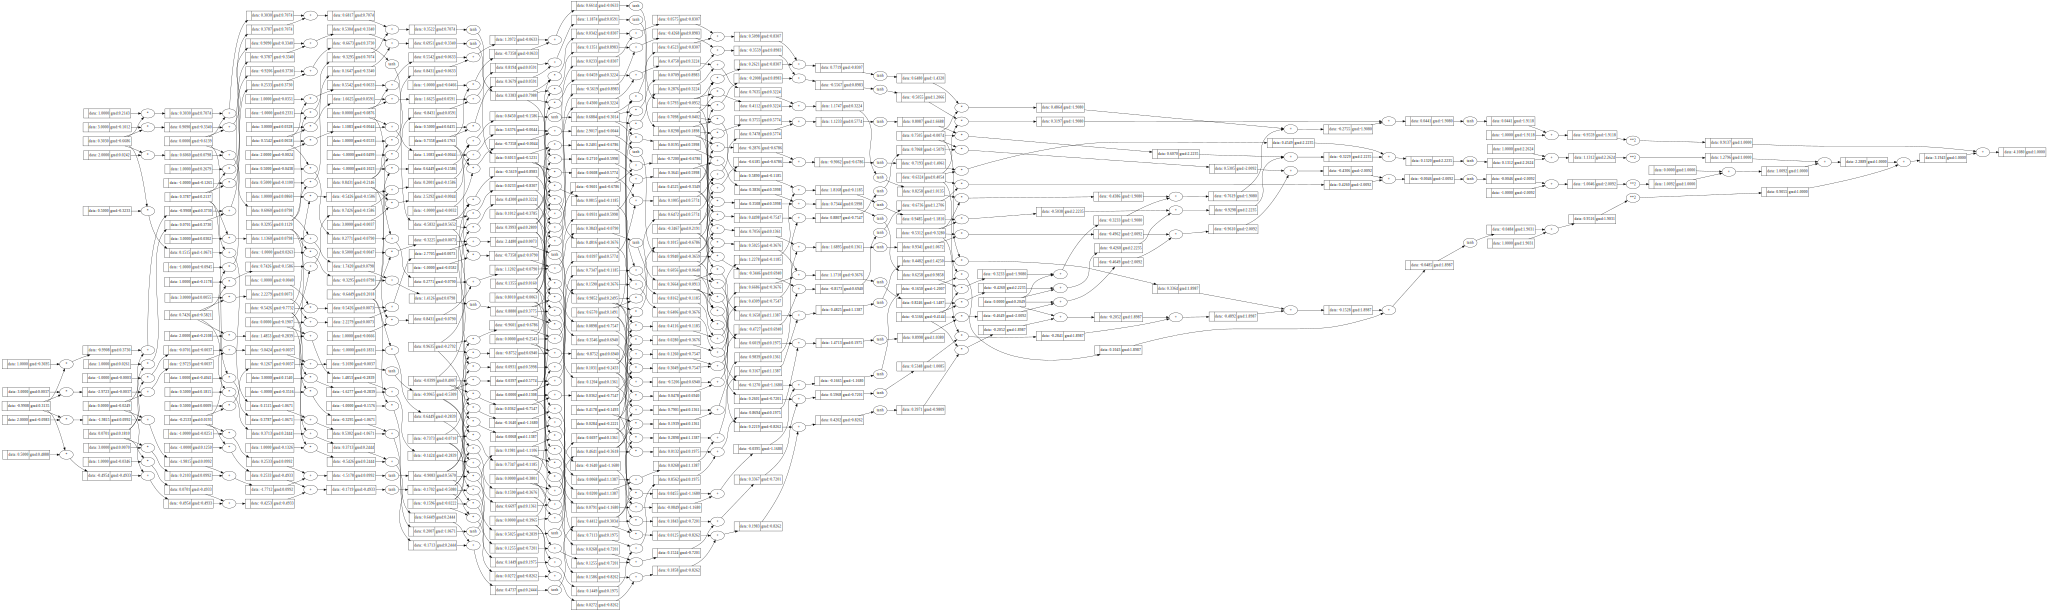

In [19]:
loss.backward()
draw_dot(loss)

In [20]:
m.layers[0].neurons[1].w[1].grad

0.21367629684627132

Remember that we want to **minimize** the loss, so we need to **substract** the gradient.

Now, we need to add a mechanisms to track which nodes contains values that can be updated, in contrast with input nodes and temporary nodes.

In [21]:
import random

class Neuron:    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
        
    def __call__(self, x):
        # return tanh(w * x + b)
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    

class Layer:    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs if len(outs) > 1 else outs[0]
    
    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]
    

class MLP:    
    def __init__(self, nin, nout):
        sz = [nin] + nout
        self.layers = [Layer(zi, zo) for zi, zo in zip(sz, sz[1:])]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for l in self.layers for p in l.parameters()]


In [22]:
m = MLP(3, [4, 4, 1])
m.parameters()

[Value(, data=-0.7472408316603392, grad=0.0),
 Value(, data=0.9036719183654336, grad=0.0),
 Value(, data=0.2693281945352288, grad=0.0),
 Value(, data=0.582549738077665, grad=0.0),
 Value(, data=-0.6934351695714942, grad=0.0),
 Value(, data=0.4921739369638596, grad=0.0),
 Value(, data=0.2580499188765335, grad=0.0),
 Value(, data=-0.09397485523896476, grad=0.0),
 Value(, data=-0.7189056649744061, grad=0.0),
 Value(, data=-0.4824858522382167, grad=0.0),
 Value(, data=-0.20588159145215923, grad=0.0),
 Value(, data=0.1824542864570815, grad=0.0),
 Value(, data=-0.26624929179014933, grad=0.0),
 Value(, data=-0.7018654351438238, grad=0.0),
 Value(, data=-0.6831722599581773, grad=0.0),
 Value(, data=-0.3386633711369016, grad=0.0),
 Value(, data=-0.08603233083311101, grad=0.0),
 Value(, data=-0.1590008633638862, grad=0.0),
 Value(, data=0.49670922533394535, grad=0.0),
 Value(, data=-0.6270707998689498, grad=0.0),
 Value(, data=-0.849546977937663, grad=0.0),
 Value(, data=-0.05698699735259716, gr

In [23]:
for l in m.layers:
    print(len(l.parameters()))
print("-"*10)
print(len(m.parameters()))

16
20
5
----------
41


layer1: 3 * 4 + 4

layer2: 4 * 4 + 4

layer3: 4 * 1 + 1

In [24]:
ypred = [m(x) for x in xs]
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
print(loss)

for p in m.parameters():
    p.grad = 0
loss.backward()

learning_rate = 0.01
for p in m.parameters():
    p.data -= learning_rate * p.grad

    
ypred = [m(x) for x in xs]
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
print(loss)

Value(, data=3.9355143638854595, grad=0.0)
Value(, data=3.8512573095042253, grad=0.0)


What about the learning rate?

In [25]:
def test_learning_rate(learning_rate):
    m = MLP(3, [4, 4, 1])
    ypred = [m(x) for x in xs]
    loss1 = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])

    for p in m.parameters():
        p.grad = 0
    loss1.backward()

    for p in m.parameters():
        p.data -= learning_rate * p.grad
        
    ypred = [m(x) for x in xs]
    loss2 = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
    print(loss1.data, loss2.data)

In [26]:
test_learning_rate(0.01)

5.119330791831553 4.341967352361026


In [27]:
test_learning_rate(0.1)

3.539867833405336 3.9718159437046086


In [28]:
test_learning_rate(1)

7.44670538575009 4.901396286894461


In [29]:
test_learning_rate(10)

4.409118036567951 7.7379541972956725


# Example 1. Simple dataset

In [30]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

# Each sample input has one desired output that we want our MLP to predict

ys = [1.0, -1.0, -1.0, 1.0] # desired predictions

In [31]:
P = MLP(3, [4, 4, 1])

In [32]:
# Writing out the training loop

training_cycles = 20
learning_rate = 0.1

for i in range(training_cycles):

    # forward pass
    y_predicted = [P(x) for x in xs]

    # recalculate loss
    loss = sum([(y_output - y_ground_truth)**2 for y_ground_truth, y_output in zip(ys, y_predicted)])

    # backward pass
    
    # COMMON BUG: Forgetting to zero-out your gradients before
    # running the next backward pass
    
    for p in P.parameters():
        p.grad = 0
    y_predicted = [P(x) for x in xs]
    loss.backward()

    # gradient updates
    for p in P.parameters():
        p.data += -learning_rate * p.grad
        
    # print current loss
    print(f'i={i}: loss={loss}')

i=0: loss=Value(, data=5.868992007202538, grad=1.0)
i=1: loss=Value(, data=2.2191247131559377, grad=1.0)
i=2: loss=Value(, data=2.7938587351559505, grad=1.0)
i=3: loss=Value(, data=1.100776240663766, grad=1.0)
i=4: loss=Value(, data=0.04131159267231412, grad=1.0)
i=5: loss=Value(, data=0.035961999595238936, grad=1.0)
i=6: loss=Value(, data=0.03203968242975993, grad=1.0)
i=7: loss=Value(, data=0.028979957440733044, grad=1.0)
i=8: loss=Value(, data=0.02649714109523201, grad=1.0)
i=9: loss=Value(, data=0.024427095603149034, grad=1.0)
i=10: loss=Value(, data=0.02266671289526943, grad=1.0)
i=11: loss=Value(, data=0.021146844700949238, grad=1.0)
i=12: loss=Value(, data=0.019818770432174837, grad=1.0)
i=13: loss=Value(, data=0.018646826513343838, grad=1.0)
i=14: loss=Value(, data=0.017604107670974634, grad=1.0)
i=15: loss=Value(, data=0.01666981659737178, grad=1.0)
i=16: loss=Value(, data=0.015827553347846326, grad=1.0)
i=17: loss=Value(, data=0.015064168351300653, grad=1.0)
i=18: loss=Value(

In [33]:
y_predicted, ys

([Value(, data=0.9401153172717125, grad=0.0),
  Value(, data=-0.9289650822570064, grad=0.0),
  Value(, data=-0.957876963971171, grad=0.0),
  Value(, data=0.9423227415694581, grad=0.0)],
 [1.0, -1.0, -1.0, 1.0])

# Solving moon problem

In [34]:
import numpy as np

np.random.seed(1337)
random.seed(1337)

/home/milton/miniconda3/envs/torch_teach/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


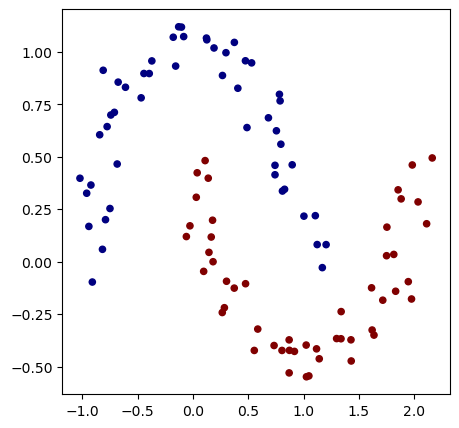

In [35]:
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [36]:
# initialize a model 
model = MLP(2, [32, 16, 1]) # 3-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

number of parameters 641


In [37]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)


Value(, data=0.814147202125666, grad=0.0) 0.64


In [43]:
# optimization
n_epoch = 50

for k in range(n_epoch):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    for p in model.parameters():
        p.grad = 0
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 0.1 
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.2571748644207613, accuracy 90.0%
step 1 loss 0.25347424952957215, accuracy 91.0%
step 2 loss 0.24994483770372938, accuracy 92.0%
step 3 loss 0.24656322584292942, accuracy 92.0%
step 4 loss 0.2433092814408482, accuracy 92.0%
step 5 loss 0.24016558797849233, accuracy 92.0%
step 6 loss 0.2371170282843099, accuracy 92.0%
step 7 loss 0.23415046960443484, accuracy 92.0%
step 8 loss 0.2312545242547109, accuracy 92.0%
step 9 loss 0.22841936643297836, accuracy 92.0%
step 10 loss 0.2256365901894472, accuracy 92.0%
step 11 loss 0.22289909647766482, accuracy 92.0%
step 12 loss 0.22020099922081665, accuracy 92.0%
step 13 loss 0.21753754186746474, accuracy 92.0%
step 14 loss 0.2149050173063175, accuracy 92.0%
step 15 loss 0.21230068548711334, accuracy 93.0%
step 16 loss 0.2097226847709896, accuracy 93.0%
step 17 loss 0.2071699349095134, accuracy 93.0%
step 18 loss 0.2046420315168163, accuracy 93.0%
step 19 loss 0.2021391337598193, accuracy 93.0%
step 20 loss 0.19966184851832033, accura

(-1.548639298268643, 1.951360701731357)

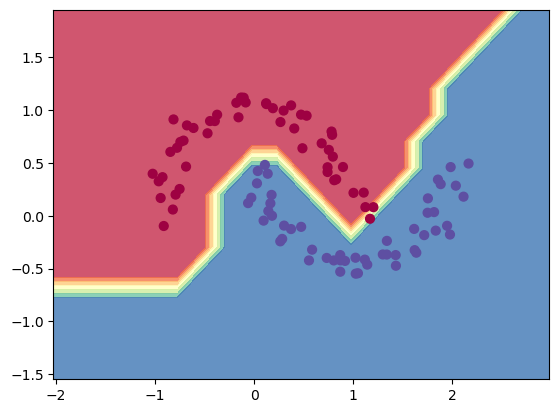

In [44]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())